In [1]:
#5 Regression Analysis-Multiple Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Student_Performance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9998 non-null   float64
 1   Previous Scores                   9992 non-null   float64
 2   Extracurricular Activities        9984 non-null   object 
 3   Sleep Hours                       9985 non-null   float64
 4   Sample Question Papers Practiced  9983 non-null   float64
 5   Performance Index                 9987 non-null   float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [3]:
#Fine the unique value of object datatype column
df['Extracurricular Activities'].unique()

array(['Yes', 'No', nan], dtype=object)

In [4]:
# Performing one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Extracurricular Activities']])
print(transformed.toarray())
df['Extracurricular Activities']=transformed.toarray()

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9998 non-null   float64
 1   Previous Scores                   9992 non-null   float64
 2   Extracurricular Activities        10000 non-null  float64
 3   Sleep Hours                       9985 non-null   float64
 4   Sample Question Papers Practiced  9983 non-null   float64
 5   Performance Index                 9987 non-null   float64
dtypes: float64(6)
memory usage: 468.9 KB


In [6]:
#Finding the missing values in each column
missing_col=df.columns[df.isnull().any()]

In [7]:
#Handling missing values using Simple Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
imp.fit(df[missing_col])
df[missing_col]=imp.transform(df[missing_col])


C:\Users\91961\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\91961\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Previous Scores                   10000 non-null  float64
 2   Extracurricular Activities        10000 non-null  float64
 3   Sleep Hours                       10000 non-null  float64
 4   Sample Question Papers Practiced  10000 non-null  float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [9]:
# Extracting the independent variables from the dataset
x=df.iloc[:,0:5]
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7.0,99.0,0.0,9.0,1.0
1,4.0,82.0,1.0,4.0,2.0
2,8.0,51.0,0.0,7.0,2.0
3,5.0,52.0,0.0,5.0,2.0
4,7.0,75.0,1.0,8.0,5.0
...,...,...,...,...,...
9995,1.0,49.0,0.0,4.0,2.0
9996,7.0,64.0,0.0,8.0,5.0
9997,6.0,83.0,0.0,8.0,5.0
9998,9.0,97.0,0.0,7.0,0.0


In [10]:
# Extracting dependent variables from the dataset
y=df.iloc[:,5]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [11]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Fitting a linear regression model
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

C:\Users\91961\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [16]:
prediction=lr.predict(x_test)

C:\Users\91961\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [17]:
#Performance Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [18]:
score=r2_score(y_test,prediction)*100
score

98.87699786401475

In [19]:
#Actual Vs Predicted
df2=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
df2

,Actual,Predicted
5669,40.0,40.459696
8800,86.0,81.040092
3205,60.0,56.026850
8731,73.0,74.937852
6412,45.0,46.908758
...,...,...
794,73.0,69.577358
142,94.0,92.088025
275,49.0,51.044364
8265,35.0,32.986304


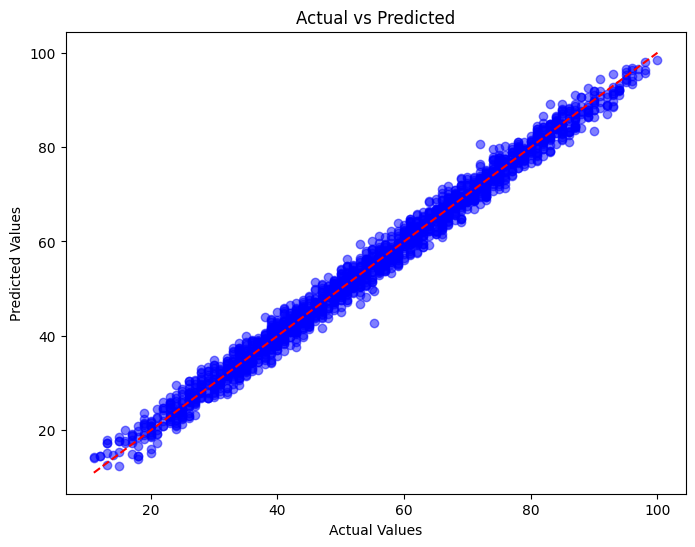

In [22]:
# Create a scatter plot
actual_values =y_test
predicted_values =prediction
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='b', alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='r', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()